## Importing Libraries and CSV data

In [17]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import boxcox
import seaborn as sns
from scipy.stats import skew
from scipy import stats
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read CSV files
# Question 1
cities_df = pd.read_csv("World Cities Data.csv")
print("Top 5 head dataset of world cities data")
print(cities_df.head(5))
print()
# Question 2 and 8
income_df = pd.read_csv("Income Distribution Dataset.csv")
print("Top 5 head dataset of Income Distribution Dataset")
print(income_df.head(5))
print()
# Question 3
companyRevenue_df = pd.read_csv("Top Company Revenue.csv")
print("Top 5 head dataset of Company Spending Dataset")
print(companyRevenue_df.head(5))
print()
# Question 4
housing_df = pd.read_csv("AmesHousing.csv")
print("Top 5 head dataset of Housing Dataset")
print(housing_df.head(5))
print()
# Question 5
retail_df = pd.read_csv("Online Retail Sales.csv")
print("Top 5 head dataset of Retail Dataset")
print(retail_df.head(5))
print()
# Question 6
customerSpending_df = pd.read_csv("Customer Spending Dataset.csv")
print("Top 5 head dataset of Customer Spending Dataset")
print(customerSpending_df.head(5))
print()
# Question 7
propertySale_df = pd.read_csv("Property Sales.csv")
print("Top 5 head dataset of Property Sale Dataset")
print(propertySale_df.head(5))
print()
# Question 9
print("Top 5 head dataset of Marketing Campaign Dataset")
# Load the dataset using semicolon as delimiter
marketingCampaign_df = pd.read_csv("marketing_campaign.csv", sep=';')
# Save the dataset with comma as delimiter
marketingCampaign_df.to_csv("marketing_campaign_corrected.csv", index=False)
print(marketingCampaign_df.head(5))
print()
# Question 10
gdp_df = pd.read_csv("GDP.csv")
print("Top 5 head dataset of GDP Dataset")
print(gdp_df.head(5))
print()

Top 5 head dataset of world cities data
        city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629  

Top 5 head dataset of Income Distribution Dataset
   Year  Number (thousands)  Lowest  Second  Third  Fourth  Top 5 percent
0  2017              127586   24638   47110  77552  126855         237034
1  2016              126224   24518   46581  76479  123621



---



# Question 1. **City Population Distribution:**

##   - *Task:* Use a dataset of city populations, apply a Pareto distribution fit, and visualize the histogram with the fitted curve.
##   - *Analysis:* How well does the Pareto distribution model the population distribution of cities?

## **Solution 1**

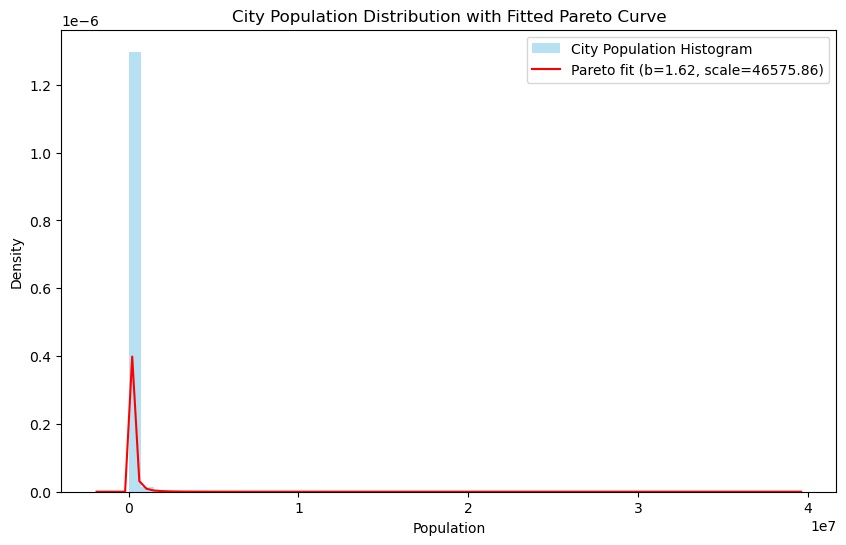

In [21]:
# Extract and clean the population data
# Remove NaN values or zero values in population
population_data = cities_df['population'].dropna()
population_data = population_data[population_data > 0]  # Remove zeros

# Step 3: Fit the Pareto distribution
# Using scipy's pareto.fit to get shape parameter (b), location (loc), and scale (scale)
b, loc, scale = pareto.fit(population_data)

# Step 4: Plot the histogram of population data
plt.figure(figsize=(10,6))
plt.hist(population_data, bins=50, density=True, alpha=0.6, color='skyblue', label='City Population Histogram')

# Step 5: Plot the fitted Pareto distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = pareto.pdf(x, b, loc, scale)
plt.plot(x, pdf_fitted, 'r-', label=f'Pareto fit (b={b:.2f}, scale={scale:.2f})')

# Labels and title
plt.title('City Population Distribution with Fitted Pareto Curve')
plt.xlabel('Population')
plt.ylabel('Density')
plt.legend()

# Step 6: Display the plot
plt.show()



---



# Question 2. **Income Distribution and Pareto Model:**

##   - *Task:* Take an income distribution dataset, fit a Pareto model, and analyze the alpha parameter.
##   - *Analysis:* How does the value of alpha influence the distribution's "long tail," and what does it suggest about income inequality?

## **Solution 2**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:7866: RuntimeWarning: divide by zero encountered in log
  return ndata / np.sum(np.log((data - location) / scale))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:7882: RuntimeWarning: divide by zero encountered in divide
  return (shape + 1) * np.sum(1 / (data - location))


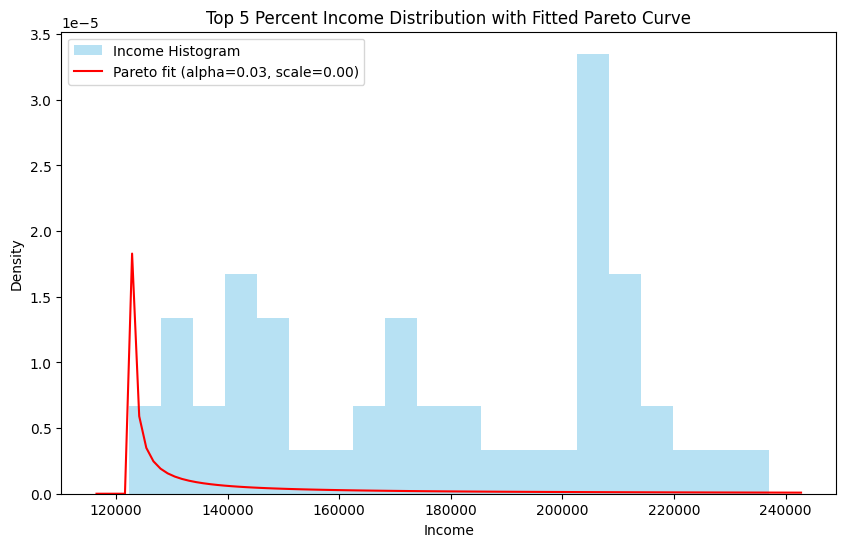

Fitted Pareto alpha (shape parameter): 0.03


In [39]:
# Step 2: Extract income data (we'll use the 'Top 5 percent' column)
top_5_income = income_df['Top 5 percent'].dropna()

# Check for zero or negative values
top_5_income = top_5_income[top_5_income > 0]

# Step 3: Shift the data if necessary (optional, if values are too close to zero)
min_value = top_5_income.min()
if min_value <= 0:
    top_5_income = top_5_income - min_value + 1  # Shift all values to be greater than zero

# Step 4: Fit the Pareto distribution
# Using scipy's pareto.fit to get the alpha (shape), location, and scale
alpha, loc, scale = pareto.fit(top_5_income)

# Step 5: Plot the histogram of the top 5 percent income data
plt.figure(figsize=(10,6))
plt.hist(top_5_income, bins=20, density=True, alpha=0.6, color='skyblue', label='Income Histogram')

# Step 6: Plot the fitted Pareto distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = pareto.pdf(x, alpha, loc, scale)
plt.plot(x, pdf_fitted, 'r-', label=f'Pareto fit (alpha={alpha:.2f}, scale={scale:.2f})')

# Labels and title
plt.title('Top 5 Percent Income Distribution with Fitted Pareto Curve')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()

# Step 7: Display the plot
plt.show()

# Step 8: Analysis of alpha
print(f"Fitted Pareto alpha (shape parameter): {alpha:.2f}")



---



# Question 3. **Company Revenue and Pareto Fit:**

##   - *Task:* Using data on the revenue of the top 100 companies, fit a Pareto distribution and visualize the fit.
##   - *Analysis:* Is there a clear “80-20” rule where a few companies hold the majority of revenue?


## **Solution 3**

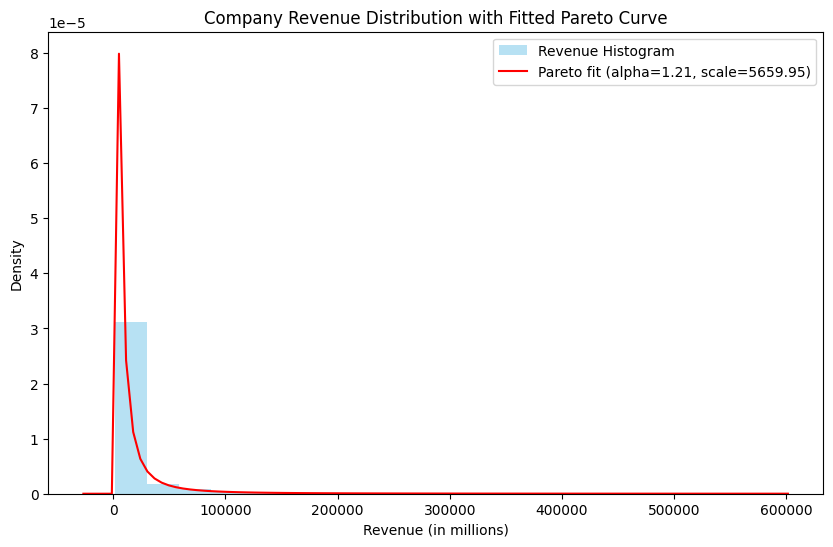

Percentage of total revenue held by top 20% companies: 71.17%


In [40]:
# Step 2: Extract revenue data and clean it
# Remove any missing or zero values in the revenue column
revenue_data = companyRevenue_df['revenue'].dropna()
revenue_data = revenue_data[revenue_data > 0]

# Step 3: Fit the Pareto distribution
alpha, loc, scale = pareto.fit(revenue_data)

# Step 4: Plot the histogram of the company revenue data
plt.figure(figsize=(10,6))
plt.hist(revenue_data, bins=20, density=True, alpha=0.6, color='skyblue', label='Revenue Histogram')

# Step 5: Plot the fitted Pareto distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = pareto.pdf(x, alpha, loc, scale)
plt.plot(x, pdf_fitted, 'r-', label=f'Pareto fit (alpha={alpha:.2f}, scale={scale:.2f})')

# Labels and title
plt.title('Company Revenue Distribution with Fitted Pareto Curve')
plt.xlabel('Revenue (in millions)')
plt.ylabel('Density')
plt.legend()

# Step 6: Display the plot
plt.show()

# Step 7: Analysis of alpha and the 80-20 rule
# Sorting revenue to analyze the top 20% companies' share of total revenue
revenue_sorted = revenue_data.sort_values(ascending=False)
total_revenue = revenue_sorted.sum()
top_20_percent_revenue = revenue_sorted.iloc[:int(0.2 * len(revenue_sorted))].sum()
percent_revenue_top_20 = (top_20_percent_revenue / total_revenue) * 100

# Display the percentage of revenue held by the top 20% companies
print(f"Percentage of total revenue held by top 20% companies: {percent_revenue_top_20:.2f}%")



---



# Question 4. **Housing Prices and Box-Cox Transformation:**
##   - *Task:* Apply the Box-Cox transformation to a skewed housing price dataset and visualize the data before and after transformation.
##   - *Analysis:* How does the transformation affect the skewness and distribution shape?


## **Solution 4**

<ipython-input-41-492cb1653349>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(x/1000)}K' for x in ticks_loc])


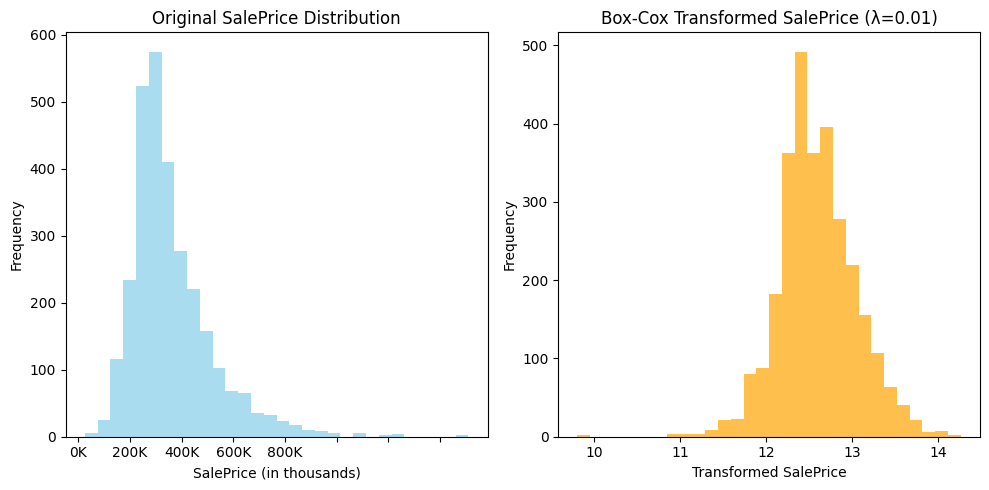

Original Skewness: 1.74
Transformed Skewness: 0.00


In [41]:
# Step 2: Extract the 'SalePrice' column
sale_price = housing_df['SalePrice']

# Step 3: Visualize the original distribution with improved x-axis formatting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(sale_price, bins=30, color='skyblue', alpha=0.7)
plt.title('Original SalePrice Distribution')
plt.xlabel('SalePrice (in thousands)')
plt.ylabel('Frequency')

# Adjust x-axis to display values in thousands
ticks_loc = plt.gca().get_xticks().tolist()
plt.gca().set_xticklabels([f'{int(x/1000)}K' for x in ticks_loc])

# Step 4: Apply Box-Cox Transformation
# Box-Cox requires positive data, and SalePrice is positive in this case
sale_price_boxcox, lmbda = boxcox(sale_price)

# Step 5: Visualize the transformed distribution
plt.subplot(1, 2, 2)
plt.hist(sale_price_boxcox, bins=30, color='orange', alpha=0.7)
plt.title(f'Box-Cox Transformed SalePrice (λ={lmbda:.2f})')
plt.xlabel('Transformed SalePrice')
plt.ylabel('Frequency')

# Step 6: Display the plots
plt.tight_layout()
plt.show()

# Step 7: Analyze skewness before and after transformation
original_skewness = skew(sale_price)
transformed_skewness = skew(sale_price_boxcox)

print(f"Original Skewness: {original_skewness:.2f}")
print(f"Transformed Skewness: {transformed_skewness:.2f}")



---



# Question 5. **Retail Sales and Box-Cox Transformation:**
##   - *Task:* In an online retail sales dataset, find the optimal lambda for the Box-Cox transformation on purchase amounts.
##   - *Analysis:* How does changing lambda improve the normality of the data, and how could this affect further analysis?


## **Solution 5**

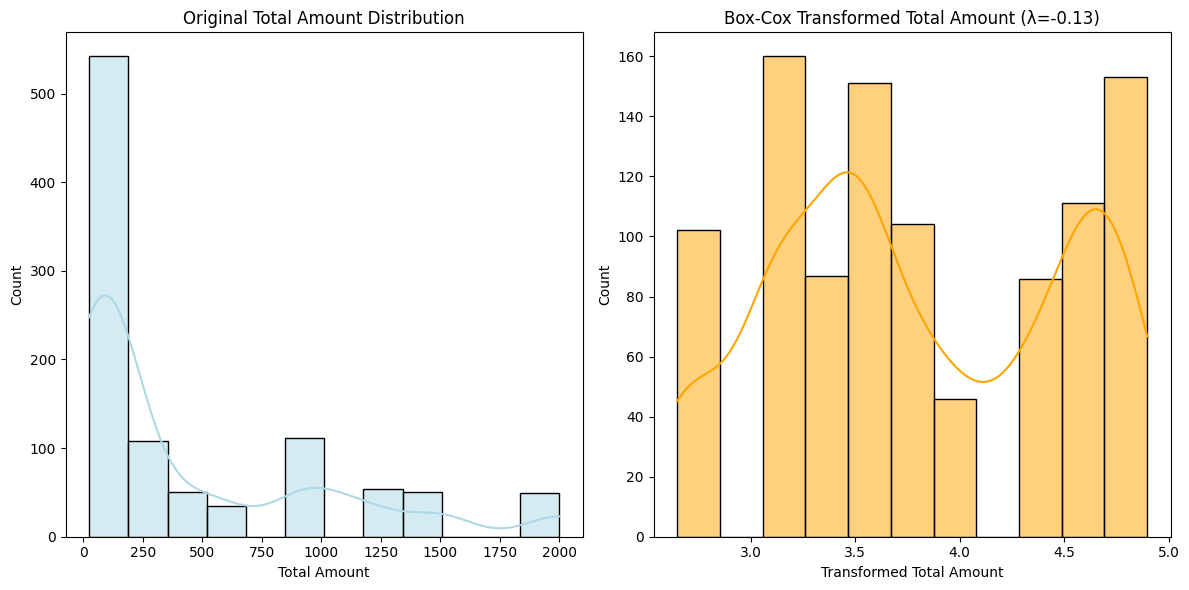

Optimal Lambda for Box-Cox Transformation: -0.12558954019094135
Skewness of Original Data: 1.3761282440171279
Skewness of Transformed Data: 0.07298624420774466


In [42]:
# Visualize the original distribution of 'Total Amount'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(retail_df['Total Amount'], kde=True, color='lightblue')
plt.title('Original Total Amount Distribution')
plt.xlabel('Total Amount')

# Apply Box-Cox transformation
# Note: Box-Cox requires all values to be positive, which is true for 'Total Amount' in this case.
transformed_data, best_lambda = stats.boxcox(retail_df['Total Amount'])

# Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color='orange')
plt.title(f'Box-Cox Transformed Total Amount (λ={round(best_lambda, 2)})')
plt.xlabel('Transformed Total Amount')

plt.tight_layout()
plt.show()

# Print the optimal lambda
print(f"Optimal Lambda for Box-Cox Transformation: {best_lambda}")

# Analyze skewness before and after transformation
original_skewness = retail_df['Total Amount'].skew()
transformed_skewness = pd.Series(transformed_data).skew()

print(f"Skewness of Original Data: {original_skewness}")
print(f"Skewness of Transformed Data: {transformed_skewness}")




---



# Question 6. **Customer Spending and Box-Cox Transformation:**

##   - *Task:* Using a customer spending dataset, apply a Box-Cox transformation and perform a normality test (Shapiro-Wilk test) before and after.
##   - *Analysis:* How does the transformation improve the normality of customer spending?

## **Solution 6**

Shapiro-Wilk Test for Original Spending Score: p-value = 0.00024229713933301153


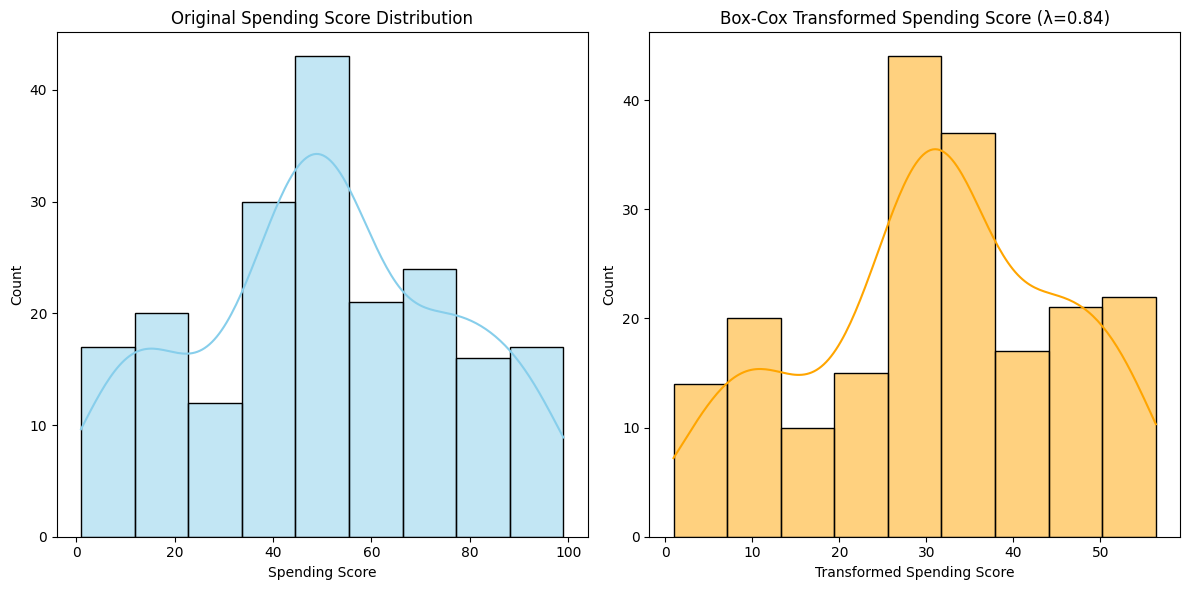

Shapiro-Wilk Test for Transformed Spending Score: p-value = 0.00015972608266048288
Optimal Lambda for Box-Cox Transformation: 0.8429139978534168
Skewness of Original Data: -0.047220201374263374
Skewness of Transformed Data: -0.22337716036055033


In [43]:
# Visualize the original distribution of 'Spending_Score'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(customerSpending_df['Spending_Score'], kde=True, color='skyblue')
plt.title('Original Spending Score Distribution')
plt.xlabel('Spending Score')

# Perform Shapiro-Wilk test on the original data
stat, p_value = shapiro(customerSpending_df['Spending_Score'])
print(f"Shapiro-Wilk Test for Original Spending Score: p-value = {p_value}")

# Apply Box-Cox transformation (requires all positive values)
transformed_data, best_lambda = stats.boxcox(customerSpending_df['Spending_Score'] + 1)  # Adding 1 to avoid zero values

# Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color='orange')
plt.title(f'Box-Cox Transformed Spending Score (λ={round(best_lambda, 2)})')
plt.xlabel('Transformed Spending Score')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test on the transformed data
stat_transformed, p_value_transformed = shapiro(transformed_data)
print(f"Shapiro-Wilk Test for Transformed Spending Score: p-value = {p_value_transformed}")

# Print optimal lambda
print(f"Optimal Lambda for Box-Cox Transformation: {best_lambda}")

# Analyze skewness before and after transformation
original_skewness = customerSpending_df['Spending_Score'].skew()
transformed_skewness = pd.Series(transformed_data).skew()

print(f"Skewness of Original Data: {original_skewness}")
print(f"Skewness of Transformed Data: {transformed_skewness}")



---



# Question 7. **Regression Model and Box-Cox Transformation:**

##   - *Task:* Train a regression model on a property sale price dataset with and without applying Box-Cox on the sale prices.
##   - *Analysis:* Compare model accuracy to see how the transformation impacts predictive performance.


## **Solution 7**

Model Performance Without Box-Cox Transformation:
MAE: 139637.17687733492
RMSE: 212085.61847610216
R-Squared: 0.3343318719500482

Model Performance With Box-Cox Transformation:
MAE: 132071.60222666463
RMSE: 213648.76586294567
R-Squared: 0.32448328372388224


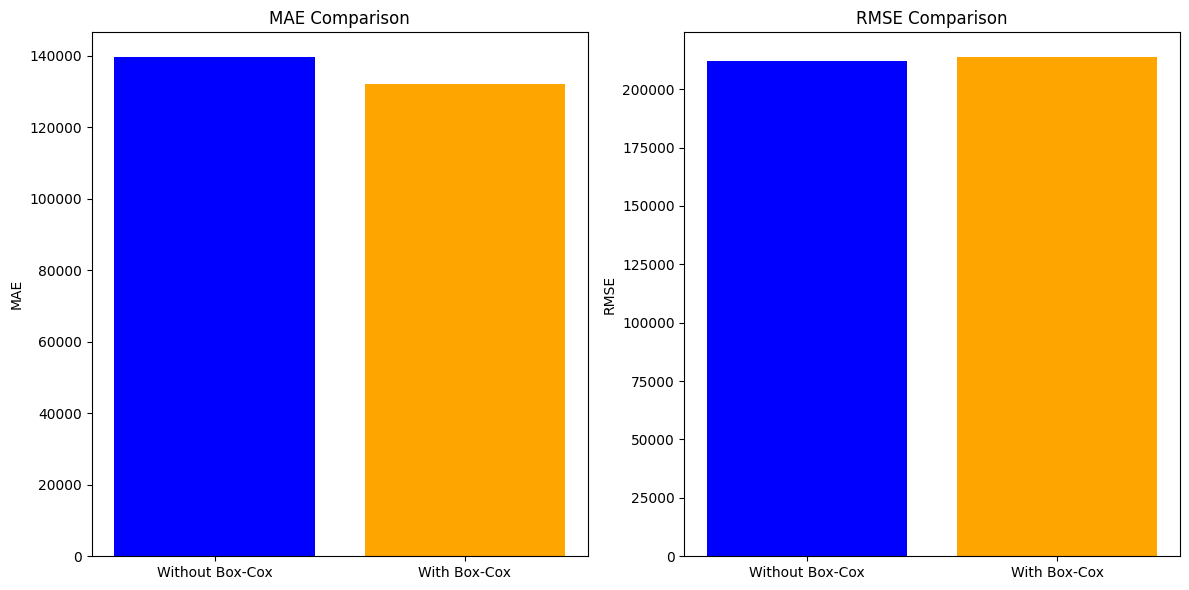

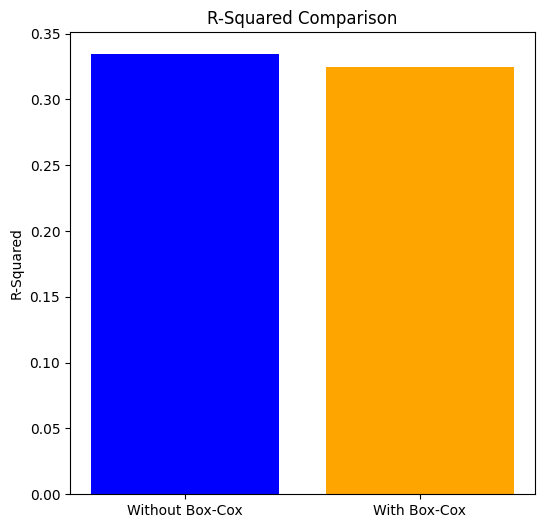

In [44]:
# Convert 'datesold' to datetime format
propertySale_df['datesold'] = pd.to_datetime(propertySale_df['datesold'])

# Handle missing values (if any)
propertySale_df.dropna(inplace=True)

# Label encode the categorical 'propertyType' column
le = LabelEncoder()
propertySale_df['propertyType'] = le.fit_transform(propertySale_df['propertyType'])

# Feature selection
X = propertySale_df[['postcode', 'propertyType', 'bedrooms']]
y = propertySale_df['price']

# Split the data into training and test sets for both scenarios (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------ Without Box-Cox Transformation ------------------------ #

# Train the model without Box-Cox transformation
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance Without Box-Cox Transformation:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")

# ------------------------ With Box-Cox Transformation ------------------------ #

# Apply Box-Cox transformation to the target variable 'price'
y_train_transformed, lambda_ = stats.boxcox(y_train + 1)  # Adding 1 to avoid zeros

# Train the model with transformed 'price'
model_transformed = LinearRegression()
model_transformed.fit(X_train, y_train_transformed)

# Predict on the test set (original y_test)
y_pred_transformed = model_transformed.predict(X_test)

# Define inverse Box-Cox transformation function
def inv_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y) - 1
    else:
        return np.power(lambda_ * y + 1, 1 / lambda_)

# Reverse Box-Cox transformation on the predictions to compare with original y_test
y_pred_inverse_transformed = inv_boxcox(y_pred_transformed, lambda_)

# Evaluate the transformed model
mae_transformed = mean_absolute_error(y_test, y_pred_inverse_transformed)
rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred_inverse_transformed))
r2_transformed = r2_score(y_test, y_pred_inverse_transformed)

print("\nModel Performance With Box-Cox Transformation:")
print(f"MAE: {mae_transformed}")
print(f"RMSE: {rmse_transformed}")
print(f"R-Squared: {r2_transformed}")

# ------------------------ Comparison and Analysis ------------------------ #

# Displaying results for comparison
labels = ['Without Box-Cox', 'With Box-Cox']
mae_values = [mae, mae_transformed]
rmse_values = [rmse, rmse_transformed]
r2_values = [r2, r2_transformed]

# Plot comparison of MAE and RMSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, mae_values, color=['blue', 'orange'])
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.bar(labels, rmse_values, color=['blue', 'orange'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# Plot comparison of R-Squared
plt.figure(figsize=(6, 6))
plt.bar(labels, r2_values, color=['blue', 'orange'])
plt.title('R-Squared Comparison')
plt.ylabel('R-Squared')
plt.show()




---



# Question 8. **Wealth Distribution and Box-Cox Transformation:**

##   - *Task:* Use a population wealth dataset, apply a Box-Cox transformation, and perform an inverse transformation.
##   - *Analysis:* How accurately does the inverse transformation approximate the original wealth values?


## **Solution 8**

Mean Absolute Error between original and inverse transformed values: 1.00
Root Mean Squared Error between original and inverse transformed values: 1.00


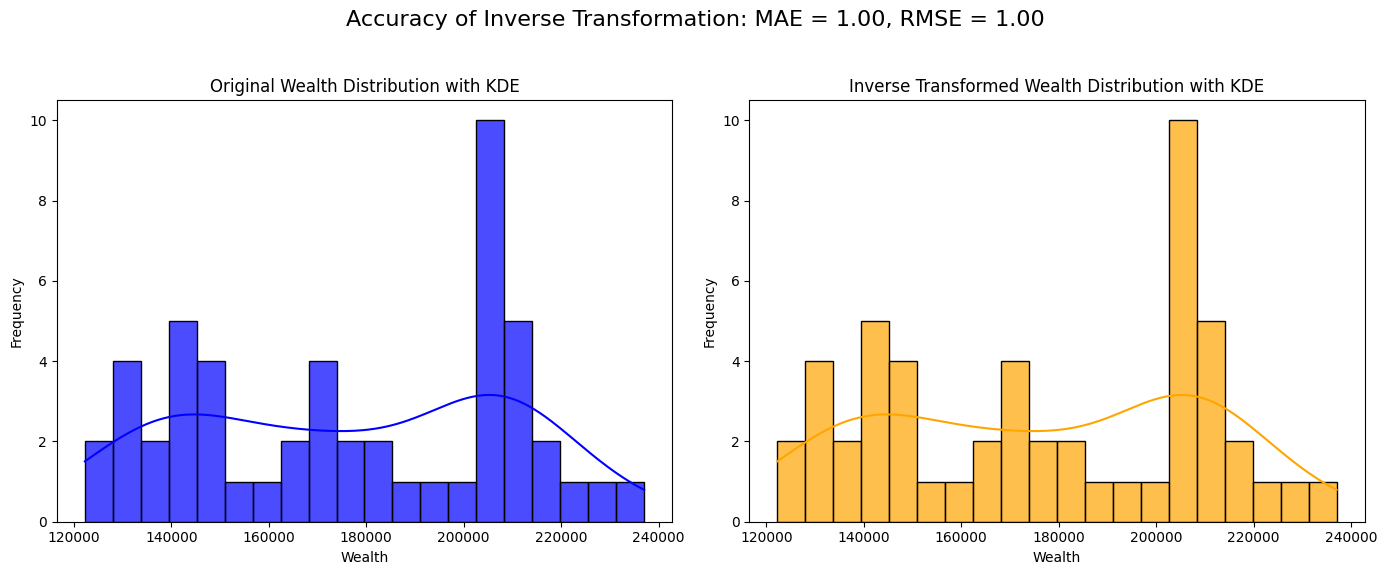

In [52]:

# Extract the 'Top 5 percent' column and handle NaN values
top_5_percent = income_df['Top 5 percent'].dropna()

# Apply Box-Cox transformation (adding 1 to avoid zeros)
top_5_percent_positive = top_5_percent + 1 if top_5_percent.min() <= 0 else top_5_percent
top_5_percent_transformed, lambda_ = stats.boxcox(top_5_percent_positive)

# Manually perform the inverse transformation
if lambda_ != 0:
    top_5_percent_inverse_transformed = (top_5_percent_transformed * lambda_ + 1) ** (1 / lambda_) - 1
else:
    top_5_percent_inverse_transformed = np.exp(top_5_percent_transformed) - 1

# Calculate accuracy metrics
mae = mean_absolute_error(top_5_percent, top_5_percent_inverse_transformed)
rmse = np.sqrt(mean_squared_error(top_5_percent, top_5_percent_inverse_transformed))

# Print the error results
print(f"Mean Absolute Error between original and inverse transformed values: {mae:.2f}")
print(f"Root Mean Squared Error between original and inverse transformed values: {rmse:.2f}")

# Plotting the original and inverse transformed values for comparison with KDE
plt.figure(figsize=(14, 6))

# Original wealth distribution with KDE
plt.subplot(1, 2, 1)
sns.histplot(top_5_percent, kde=True, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Original Wealth Distribution with KDE')
plt.xlabel('Wealth')
plt.ylabel('Frequency')

# Inverse transformed wealth distribution with KDE
plt.subplot(1, 2, 2)
sns.histplot(top_5_percent_inverse_transformed, kde=True, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Inverse Transformed Wealth Distribution with KDE')
plt.xlabel('Wealth')
plt.ylabel('Frequency')

plt.suptitle(f'Accuracy of Inverse Transformation: MAE = {mae:.2f}, RMSE = {rmse:.2f}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




---



# Question 9. **Marketing Campaign and Correlation:**

##   - *Task:* In a marketing campaign dataset, calculate Pearson correlation between customer age and campaign response before and after Box-Cox transformation on age.
##   - *Analysis:* How does the transformation impact the correlation strength?


## Solution **9**

Pearson correlation before Box-Cox transformation: -0.0213
Pearson correlation after Box-Cox transformation: -0.0238
The transformation decreased the correlation strength.


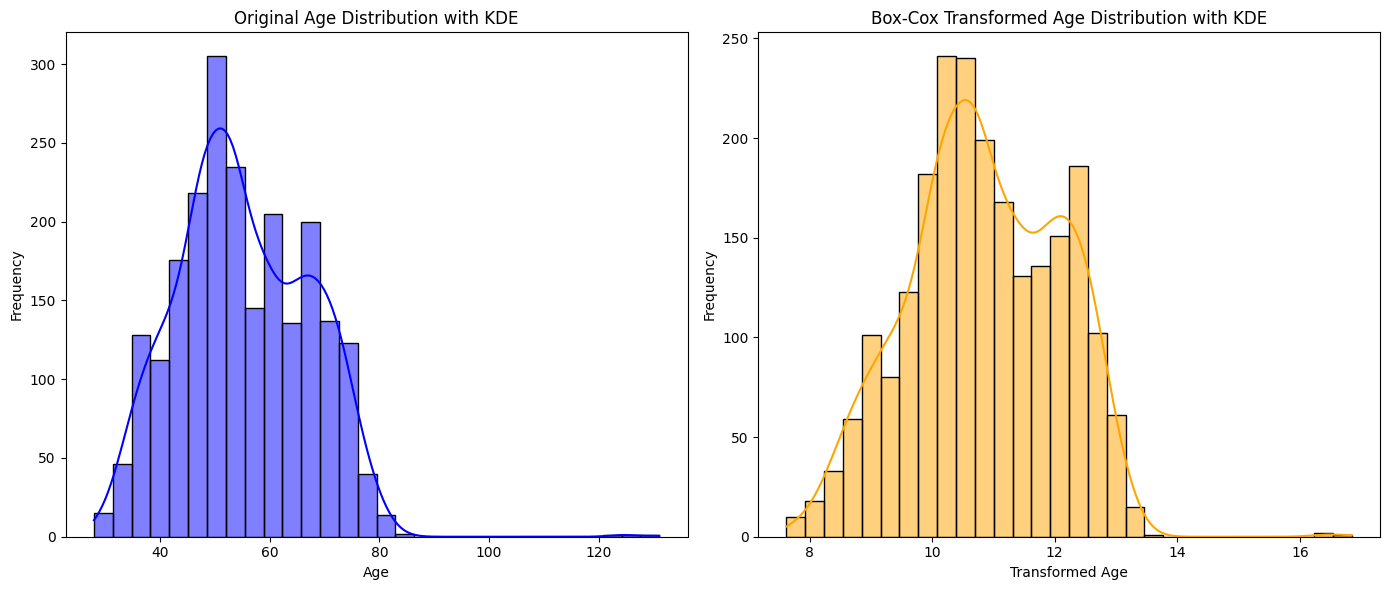

In [59]:
# Calculate age from Year_Birth
current_year = 2024  # You can adjust this to the current year
marketingCampaign_df['Age'] = current_year - marketingCampaign_df['Year_Birth']

# Extract relevant columns
age = marketingCampaign_df['Age']
response = marketingCampaign_df['Response']

# 1. Calculate Pearson correlation before Box-Cox transformation
corr_before = age.corr(response)
print(f"Pearson correlation before Box-Cox transformation: {corr_before:.4f}")

# 2. Apply Box-Cox transformation (adding a small constant to avoid zeros)
age_positive = age + 1  # Box-Cox requires positive values
age_transformed, lambda_ = stats.boxcox(age_positive)

# 3. Calculate Pearson correlation after Box-Cox transformation
corr_after = np.corrcoef(age_transformed, response)[0, 1]
print(f"Pearson correlation after Box-Cox transformation: {corr_after:.4f}")

# 4. Analysis of impact
if corr_after > corr_before:
    impact = "increased"
elif corr_after < corr_before:
    impact = "decreased"
else:
    impact = "remained the same"

print(f"The transformation {impact} the correlation strength.")

# Optional: Plotting the original and transformed age distributions with KDE
plt.figure(figsize=(14, 6))

# Original age distribution with KDE
plt.subplot(1, 2, 1)
sns.histplot(age, kde=True, bins=30, color='blue', edgecolor='black', alpha=0.5)
plt.title('Original Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Transformed age distribution with KDE
plt.subplot(1, 2, 2)
sns.histplot(age_transformed, kde=True, bins=30, color='orange', edgecolor='black', alpha=0.5)
plt.title('Box-Cox Transformed Age Distribution with KDE')
plt.xlabel('Transformed Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



---



# Question 10. **GDP Dataset and Transformations:**

##    - *Task:* Using a GDP dataset, perform a Box-Cox transformation followed by Min-Max scaling on GDP values.
##    - *Analysis:* Assess the distribution before and after to evaluate the combined impact of both transformations and discuss when this is useful in machine learning tasks.


## Solution **10**

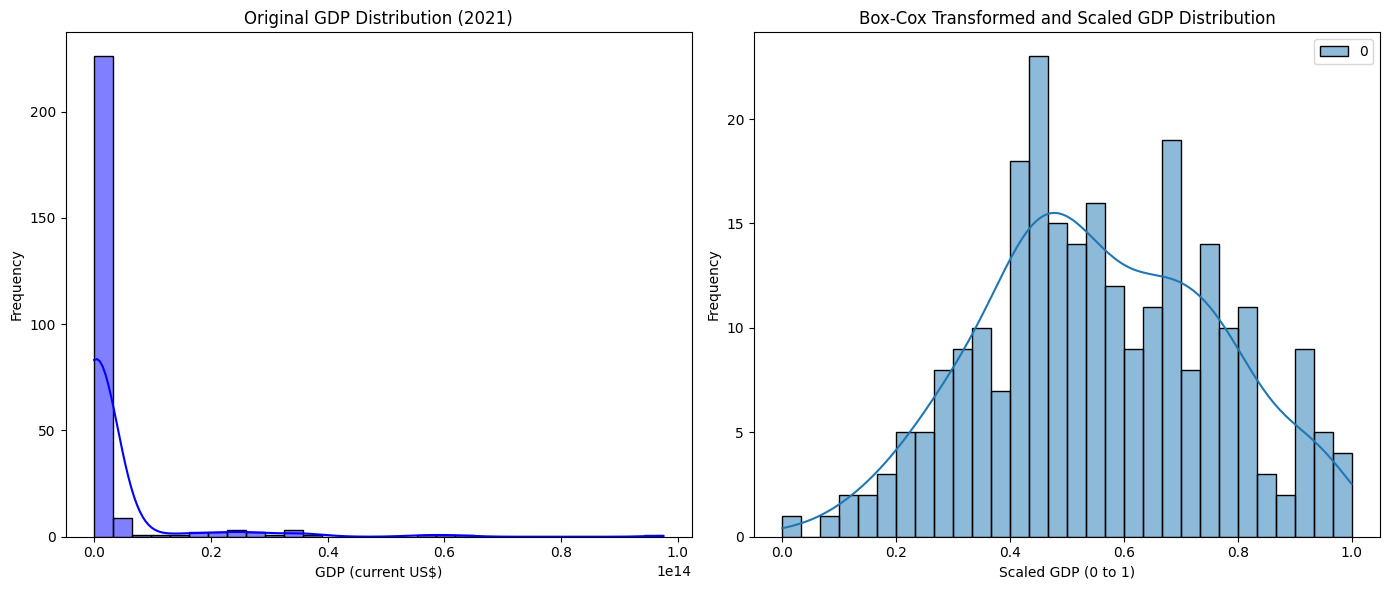

Box-Cox transformation lambda: -0.0361


In [61]:
# Extract GDP values for a specific year, e.g., 2021
# Note: Adjust the year based on your interest
gdp_values = gdp_df['2021'].dropna()  # Drop NaN values for the analysis

# 1. Box-Cox transformation (adding a small constant to avoid zero values)
gdp_positive = gdp_values + 1  # Box-Cox requires positive values
gdp_transformed, lambda_ = stats.boxcox(gdp_positive)

# 2. Min-Max scaling
scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(gdp_transformed.reshape(-1, 1))

# 3. Visualizations
plt.figure(figsize=(14, 6))

# Original GDP distribution
plt.subplot(1, 2, 1)
sns.histplot(gdp_values, kde=True, bins=30, color='blue', edgecolor='black', alpha=0.5)
plt.title('Original GDP Distribution (2021)')
plt.xlabel('GDP (current US$)')
plt.ylabel('Frequency')

# Transformed and scaled GDP distribution
plt.subplot(1, 2, 2)
sns.histplot(gdp_scaled, kde=True, bins=30, color='orange', edgecolor='black', alpha=0.5)
plt.title('Box-Cox Transformed and Scaled GDP Distribution')
plt.xlabel('Scaled GDP (0 to 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary of results
print(f"Box-Cox transformation lambda: {lambda_:.4f}")



---
END
